#Markdown Cell
Because of the sheer size and scope of the data set, the decision was made to limit exploration in order to maintain focus. As such, not all of the data was imported, and what was imported was divided up and cleaned up according to what was needed. 

In keeping with Professor Forrest's suggestion, rather than looking at the EU data set as a whole for Electricity Production and related factors and statistics, Electricity Production and Population/GDP tables were separated from the respective data sheets for 3 EU countries: The Federal Republic of Germany, the French Republic, and Portugal. 

Pandas functions were used to read the excel file, set the header as the years over which the data was recorded, and to limit the rows that the dataframes would encompass. Additionally, columns that were essentially blank or artifacts of the way in which the Excel Workbook was formatted were dropped, and the table axes were renamed to better reflect the data they represented. 

The next steps are to actually begin manipulating this data now that it is in a format that is much easier to work with. For Electricity Production, different categories of production are neatly divided by year. And for Population and GDP stats for the respective countries, that data follows the same years, and so graphs or charts generated from these tables can be compared, contrasted, combined, and further manipulated in the search for answers to some of the questions posed. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [8]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import chart_studio

In [9]:
file="countrydatasheets_august2018.xlsx"
dfGermanElectricityProduction = pd.read_excel(file, 'DE', header=7, index_col = 2)
#by choice, the data that will be focused on will be electricity production, with GDP as a dependent variable
dfGermanElectricityProduction = dfGermanElectricityProduction[170:185]
#the following four lines drop blank/invalid columns and rename the label to accurately reflect the table being shown
mappingRemoval = {dfGermanElectricityProduction.columns[0]:'Remove This'}
dfGermanElectricityProduction=dfGermanElectricityProduction.rename(columns = mappingRemoval)
dfGermanElectricityProduction=dfGermanElectricityProduction.drop(["Unnamed: 1"], axis=1)
dfGermanElectricityProduction=dfGermanElectricityProduction.drop(["Remove This"], axis=1)
dfGermanElectricityProduction=dfGermanElectricityProduction.rename_axis("Electricity Production (Germany)")
#show the table
dfGermanElectricityProduction.head(17)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Electricity Production (Germany),,,,,,,,,,,,,,,,,,,,,
"Gross Electricity Generation, by Fuel - TWh",5.500150e+02,539.634,5.374700e+02,526.276,5.291600e+02,5.372840e+02,5.553720e+02,5.515540e+02,5.563930e+02,5.563000e+02,...,640.578,640.406,595.617,632.983,613.068,629.812,638.729,627.795,646.888,649.119
Solid Fuels,3.108770e+02,307.673,2.956720e+02,293.243,2.902840e+02,2.891420e+02,2.959920e+02,2.843400e+02,2.922580e+02,2.812700e+02,...,297.106,275.208,253.447,262.896,262.469,277.128,288.203,274.411,272.2,261.745
Petroleum and Products 2,1.039700e+01,14.740,1.321700e+01,10.091,8.774000e+00,8.983000e+00,7.966000e+00,6.866000e+00,6.376000e+00,5.845000e+00,...,10.007,9.678,10.066,8.741,7.162,7.627,7.198,5.659,6.209,5.846
Gases,5.122400e+01,45.354,4.207400e+01,41.126,4.685500e+01,5.040300e+01,5.468900e+01,5.779900e+01,6.051700e+01,6.197000e+01,...,90.779,100.513,88.926,100.912,97.14,87.487,79.545,72.77,74.527,93.745
Nuclear,1.524680e+02,147.229,1.588040e+02,153.276,1.507030e+02,1.530910e+02,1.600160e+02,1.703280e+02,1.616440e+02,1.700040e+02,...,140.534,148.495,134.932,140.556,107.971,99.46,97.29,97.129,91.786,84.634
Renewables,2.145800e+01,20.787,2.353300e+01,24.309,2.738800e+01,3.040200e+01,3.123200e+01,2.660500e+01,2.892000e+01,3.247200e+01,...,95.235,99.275,100.509,111.209,129.613,149.552,158.15,168.37,193.287,193.930
Hydro,1.979100e+01,18.699,2.119500e+01,21.667,2.388500e+01,2.625000e+01,2.663800e+01,2.090000e+01,2.123400e+01,2.340200e+01,...,28.084,26.469,24.682,27.353,23.511,27.849,28.782,25.444,24.898,26.135
of which pumped hydro,2.365000e+00,3.808,3.798000e+00,3.789,3.955000e+00,4.470000e+00,4.681000e+00,3.543000e+00,4.018000e+00,3.755000e+00,...,6.915,6.026,5.651,6.4,5.84,6.094,5.784,5.857,5.921,5.588
Wind,7.100000e-02,0.215,2.910000e-01,0.674,1.428000e+00,1.712000e+00,2.078000e+00,3.034000e+00,4.593000e+00,5.528000e+00,...,39.713,40.574,38.647,37.793,48.883,50.67,51.708,57.357,79.206,78.598


In [4]:
file="countrydatasheets_august2018.xlsx"
dfGermanGDP = pd.read_excel(file, 'DE', header=7, index_col = 2, skiprows=range(8,429))
#the following four lines drop blank/invalid columns and rename the label to accurately reflect the table being shown
mappingRemoval = {dfGermanGDP.columns[0]:'Remove This'}
dfGermanGDP=dfGermanGDP.rename(columns = mappingRemoval)
dfGermanGDP=dfGermanGDP.drop(["Unnamed: 1"], axis=1)
dfGermanGDP=dfGermanGDP.drop(["Remove This"], axis=1)
dfGermanGDP=dfGermanGDP.rename_axis("Population and GDP (Germany)")
#it's convenient that the population and GDP statistics are only 3 rows long anyways
dfGermanGDP.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Population and GDP (Germany),,,,,,,,,,,,,,,,,,,,,
Total Population [thousands of people],79112.831000,79753.227000,80274.564000,80974.632000,81338.093000,81538.603000,81817.499000,82012.162000,82057.379000,82037.01100,...,82314.90600,82217.83700,82002.35600,81802.257,80222.06,80327.9000,80523.7,80767.46300,81197.53700,82175.6840
GDP2010 [Mrd EUR at 2010 exchange rates],1939.433337,2038.505410,2077.722320,2057.855860,2108.425030,2145.061880,2162.606290,2202.597220,2246.200240,2290.83527,...,2598.37843,2626.50108,2478.92165,2580.060,2674.49,2687.6485,2700.81,2752.92402,2800.91314,2855.3524
GDP-market prices [Mrd EUR at current prices],1506.670812,1506.670812,1641.212346,1766.104218,1860.057308,1982.060825,1973.016771,1958.528205,2004.598366,2064.88000,...,2513.23000,2561.74000,2460.28000,2580.060,2703.12,2758.2600,2826.24,2932.47000,3043.65000,3144.0500


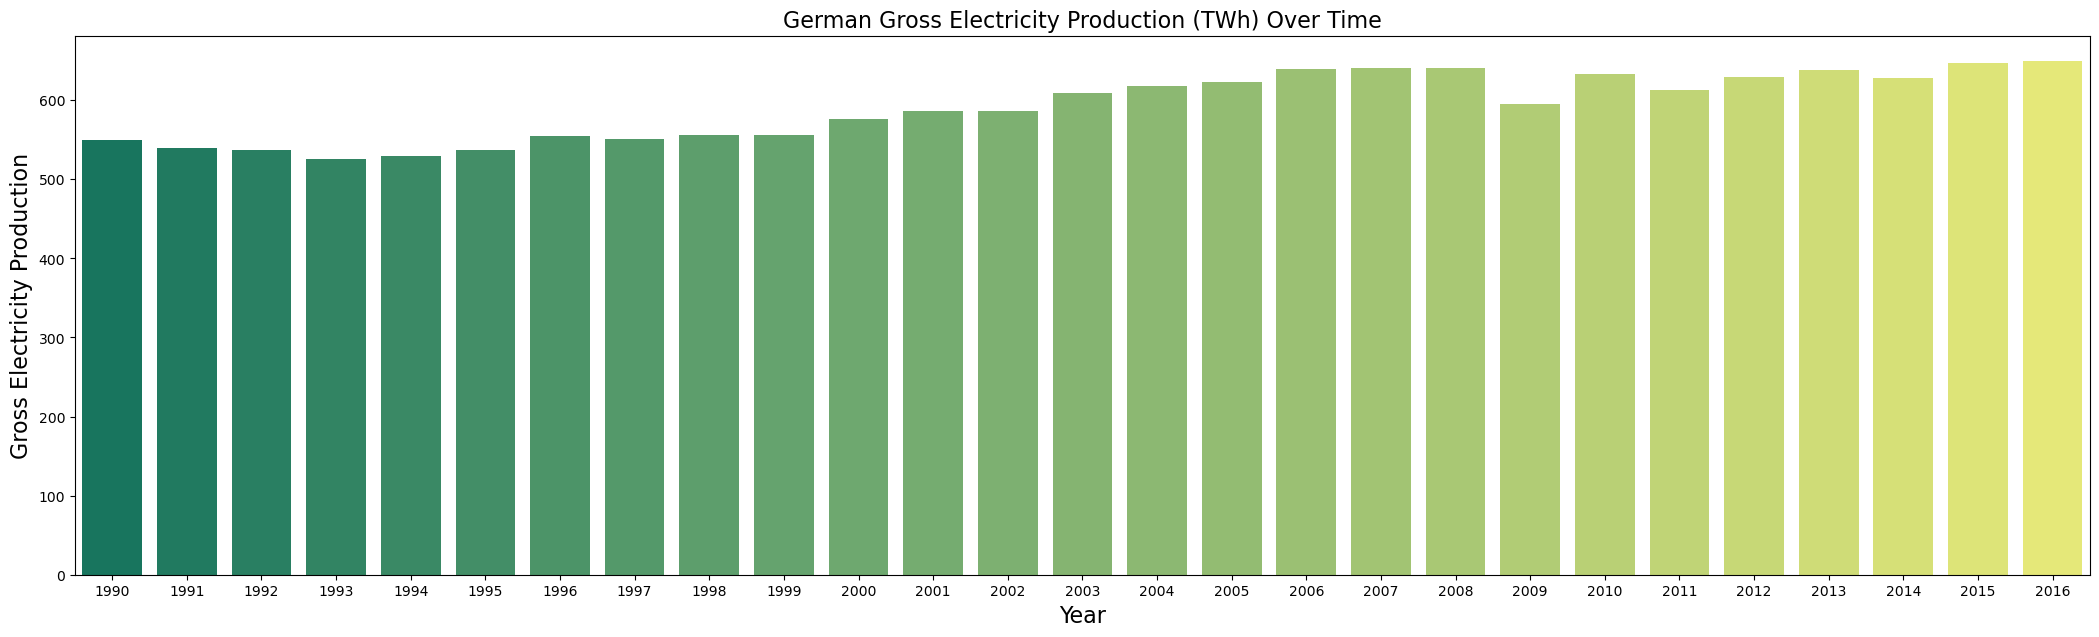

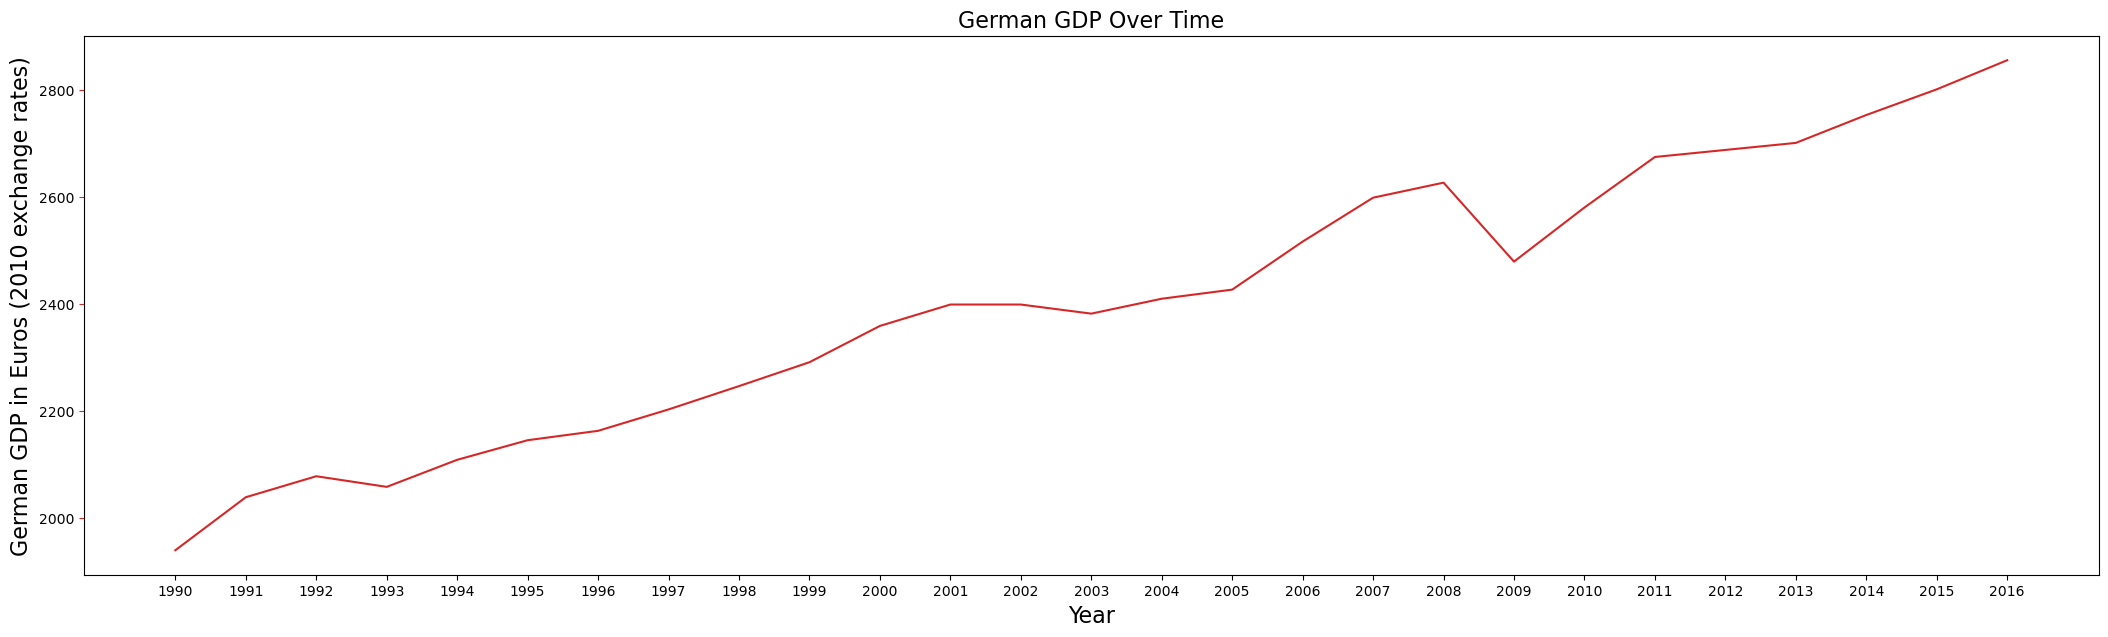

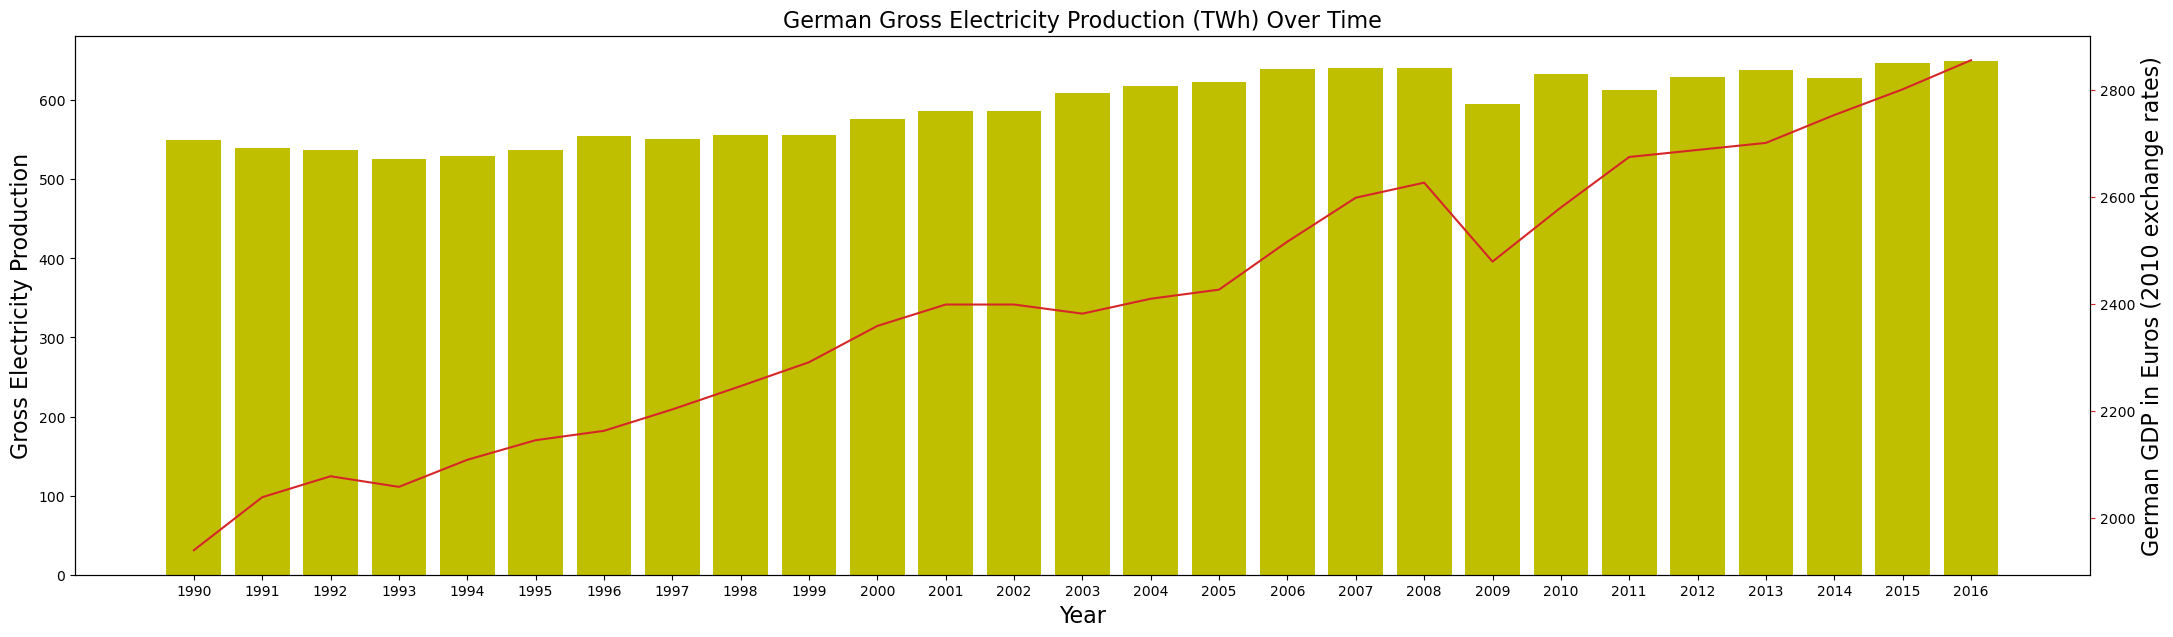

In [5]:
#only need to do this once, get the years into a list
years = list(dfGermanElectricityProduction.columns.values)
#get German gross production data into a list
dfGermanElectricityProduction_transposed = dfGermanElectricityProduction.transpose()
grosselectricityproductiongermany = dfGermanElectricityProduction_transposed['Gross Electricity Generation, by Fuel - TWh'].tolist()

#Create individual charts
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('German Gross Electricity Production (TWh) Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Gross Electricity Production', fontsize=16)

ax1 = sns.barplot(x=years, y=grosselectricityproductiongermany, data=dfGermanElectricityProduction_transposed, palette='summer')
ax1.tick_params(axis='y')

#get German GDP data into a list
dfGermanGDP_transposed = dfGermanGDP.transpose()
GDPGermany = dfGermanGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].tolist()

fig, ax2 = plt.subplots(figsize=(26,7))
color = 'tab:red'
#line plot creation
ax2.set_title('German GDP Over Time', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('German GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPGermany, data=dfGermanGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set(xticks=years)
#show plot
plt.show()

#Create combo charts
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('German Gross Electricity Production (TWh) Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Gross Electricity Production', fontsize=16)

ax1.bar(years, grosselectricityproductiongermany, color = 'y')
ax1.set(xticks=years)

#get German GDP data into a list
dfGermanGDP_transposed = dfGermanGDP.transpose()
GDPGermany = dfGermanGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].tolist()

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('German GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPGermany, data=dfGermanGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [6]:
file="countrydatasheets_august2018.xlsx"
dfFrenchElectricityProduction = pd.read_excel(file, 'FR', header=7, index_col = 2)
#by choice, the data that will be focused on will be electricity production, with GDP as a dependent variable
dfFrenchElectricityProduction = dfFrenchElectricityProduction[170:185]
#the following four lines drop blank/invalid columns and rename the label to accurately reflect the table being shown
mappingRemoval = {dfFrenchElectricityProduction.columns[0]:'Remove This'}
dfFrenchElectricityProduction=dfFrenchElectricityProduction.rename(columns = mappingRemoval)
dfFrenchElectricityProduction=dfFrenchElectricityProduction.drop(["Unnamed: 1"], axis=1)
dfFrenchElectricityProduction=dfFrenchElectricityProduction.drop(["Remove This"], axis=1)
dfFrenchElectricityProduction=dfFrenchElectricityProduction.rename_axis("Electricity Production (France)")
#show the table
dfFrenchElectricityProduction.head(17)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Electricity Production (France),,,,,,,,,,,,,,,,,,,,,
"Gross Electricity Generation, by Fuel - TWh",4.207510e+02,4.555550e+02,4.636390e+02,4.727070e+02,4.768680e+02,4.942740e+02,5.133980e+02,5.047700e+02,5.112760e+02,5.258060e+02,...,569.768,573.812,535.937,569.29,564.985,564.475,573.846,564.154,570.323,556.184
Solid Fuels,3.147300e+01,3.961000e+01,3.423400e+01,2.095100e+01,2.089300e+01,2.417900e+01,2.803800e+01,2.217800e+01,3.353200e+01,2.927900e+01,...,24.446,23.063,21.667,23.359,15.490,19.466,21.937,9.473,9.763,8.465
Petroleum and Products 2,8.668000e+00,1.408400e+01,9.319000e+00,6.091000e+00,5.617000e+00,7.749000e+00,7.790000e+00,7.727000e+00,1.165100e+01,9.952000e+00,...,6.163,5.348,4.724,5.523,3.156,3.308,2.442,2.096,2.137,2.537
Gases,6.977000e+00,6.648000e+00,6.683000e+00,7.294000e+00,6.875000e+00,6.217000e+00,7.050000e+00,8.585000e+00,8.755000e+00,1.153400e+01,...,25.738,25.255,22.855,26.714,31.784,25.373,20.801,15.68,23.685,36.919
Nuclear,3.140810e+02,3.313400e+02,3.384450e+02,3.681880e+02,3.599810e+02,3.772310e+02,3.973400e+02,3.954830e+02,3.879900e+02,3.942440e+02,...,439.73,439.447,409.736,428.521,442.388,425.406,423.685,436.479,437.428,403.195
Renewables,5.933100e+01,6.364700e+01,7.471800e+01,6.992400e+01,8.323200e+01,7.852700e+01,7.271300e+01,7.024700e+01,6.877700e+01,7.997500e+01,...,71.563,78.54,74.63,83.008,69.475,87.916,102.023,97.607,94.365,102.088
Hydro,5.741800e+01,6.154500e+01,7.258400e+01,6.794800e+01,8.106900e+01,7.619200e+01,7.028200e+01,6.755900e+01,6.610300e+01,7.708300e+01,...,63.259,68.368,61.966,67.526,49.865,63.595,75.867,68.627,59.401,64.889
of which pumped hydro,3.552000e+00,3.943000e+00,3.628000e+00,3.053000e+00,2.275000e+00,3.073000e+00,4.238000e+00,3.795000e+00,4.010000e+00,4.569000e+00,...,5.655,4.714,4.972,4.812,5.074,4.929,5.151,5.797,4.957,4.846
Wind,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-03,5.000000e-03,5.000000e-03,7.000000e-03,1.100000e-02,1.900000e-02,3.700000e-02,...,4.07,5.694,7.912,9.945,12.052,14.913,16.033,17.249,21.249,21.4


In [7]:
file="countrydatasheets_august2018.xlsx"
dfFrenchGDP = pd.read_excel(file, 'FR', header=7, index_col = 2, skiprows=range(8,429))
#the following four lines drop blank/invalid columns and rename the label to accurately reflect the table being shown
mappingRemoval = {dfFrenchGDP.columns[0]:'Remove This'}
dfFrenchGDP=dfFrenchGDP.rename(columns = mappingRemoval)
dfFrenchGDP=dfFrenchGDP.drop(["Remove This"], axis=1)
dfFrenchGDP=dfFrenchGDP.drop(["Unnamed: 1"], axis=1)
dfFrenchGDP=dfFrenchGDP.rename_axis("Population and GDP (France)")
#it's convenient that the population and GDP statistics are only 3 rows long anyways
dfFrenchGDP.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Population and GDP (France),,,,,,,,,,,,,,,,,,,,,
Total Population [thousands of people],58227.000000,58313.439000,58604.851000,58885.929000,59104.320000,59315.139000,59522.297000,59726.386000,59934.884000,60158.533,...,63645.065,64007.193,64350.226,64658.856,64978.720,65276.983,65600.4,65942.267,66456.279,66730.453
GDP2010 [Mrd EUR at 2010 exchange rates],1440.085000,1455.049000,1478.325000,1469.268000,1503.728000,1535.082000,1556.389000,1592.767000,1649.409000,1705.606,...,2015.415,2019.351,1959.955,1998.481,2040.034,2043.761,2055.54,2075.016,2097.166,2122.073
GDP-market prices [Mrd EUR at current prices],1004.341537,1032.016738,1088.896532,1135.574286,1182.190841,1231.445655,1271.857485,1289.315693,1350.164023,1408.159,...,1945.670,1995.850,1939.017,1998.481,2059.284,2086.929,2115.26,2147.609,2194.243,2228.857


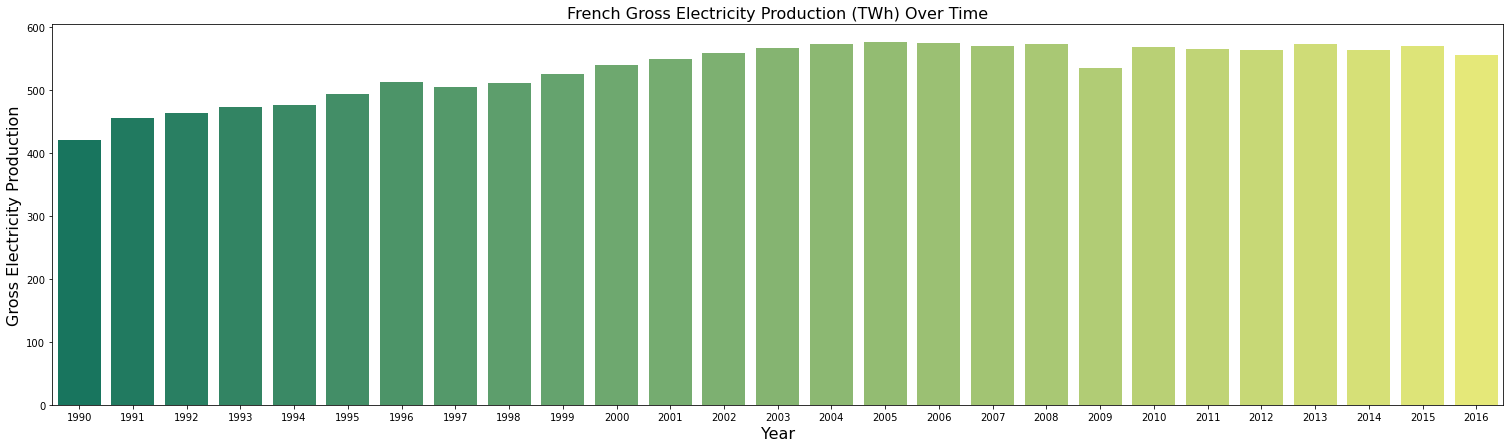

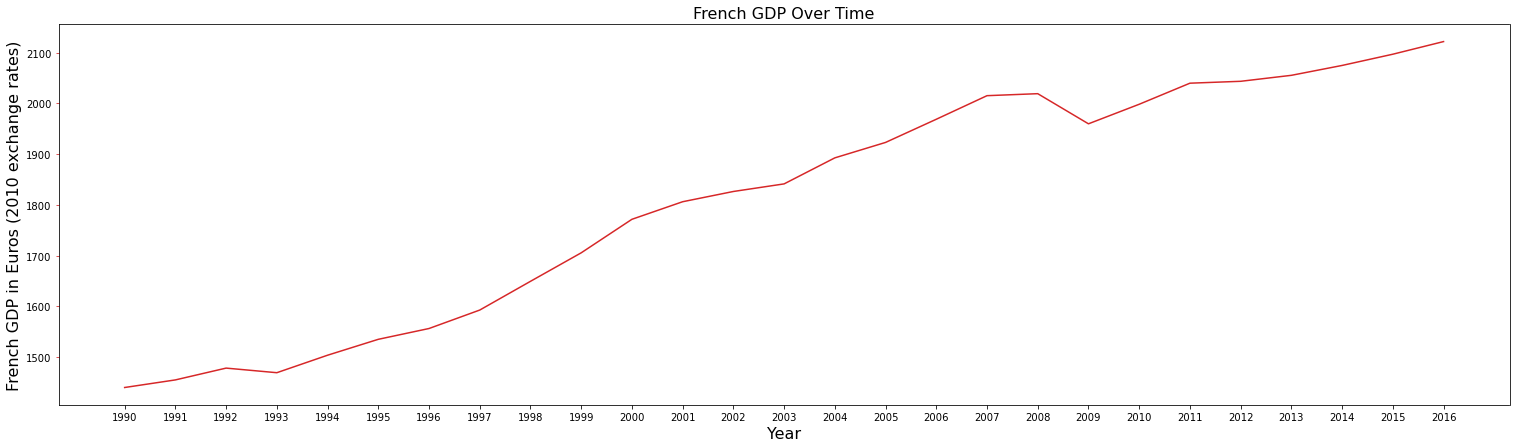

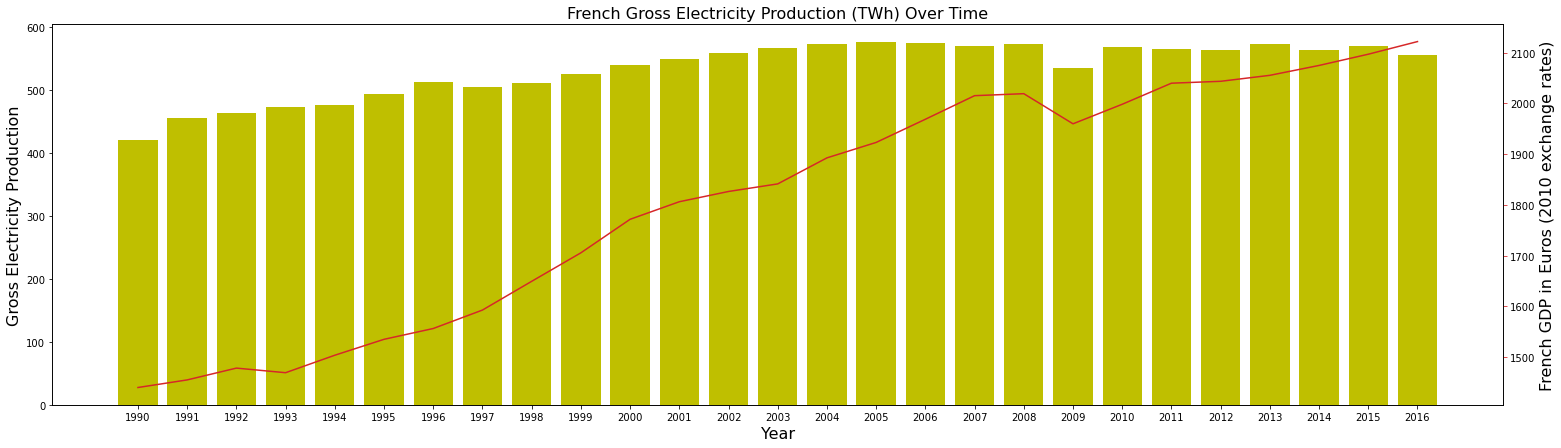

In [95]:
#only need to do this once, get the years into a list
years = list(dfFrenchElectricityProduction.columns.values)
#get French gross production data into a list
dfFrenchElectricityProduction_transposed = dfFrenchElectricityProduction.transpose()
grosselectricityproductionfrance = dfFrenchElectricityProduction_transposed['Gross Electricity Generation, by Fuel - TWh'].tolist()

#Create individual charts
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('French Gross Electricity Production (TWh) Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Gross Electricity Production', fontsize=16)

ax1 = sns.barplot(x=years, y=grosselectricityproductionfrench, data=dfFrenchElectricityProduction_transposed, palette='summer')
ax1.tick_params(axis='y')

#get French GDP data into a list
dfFrenchGDP_transposed = dfFrenchGDP.transpose()
GDPFrance = dfFrenchGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].tolist()

fig, ax2 = plt.subplots(figsize=(26,7))
color = 'tab:red'
#line plot creation
ax2.set_title('French GDP Over Time', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('French GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPFrance, data=dfFrenchGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set(xticks=years)
#show plot
plt.show()

#Create combo charts
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('French Gross Electricity Production (TWh) Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Gross Electricity Production', fontsize=16)

ax1.bar(years, grosselectricityproductionfrance, color = 'y')
ax1.set(xticks=years)

#get French GDP data into a list
dfFrenchGDP_transposed = dfFrenchGDP.transpose()
GDPFrance = dfFrenchGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].tolist()

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('French GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPFrance, data=dfFrenchGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [70]:
file="countrydatasheets_august2018.xlsx"
dfPortugueseElectricityProduction = pd.read_excel(file, 'PT', header=7, index_col = 2)
#by choice, the data that will be focused on will be electricity production, with GDP as a dependent variable
dfPortugueseElectricityProduction = dfPortugueseElectricityProduction[170:185]
#the following four lines drop blank/invalid columns and rename the label to accurately reflect the table being shown
mappingRemoval = {dfPortugueseElectricityProduction.columns[0]:'Remove This'}
dfPortugueseElectricityProduction=dfPortugueseElectricityProduction.rename(columns = mappingRemoval)
dfPortugueseElectricityProduction=dfPortugueseElectricityProduction.drop(["Unnamed: 1"], axis=1)
dfPortugueseElectricityProduction=dfPortugueseElectricityProduction.drop(["Remove This"], axis=1)
dfPortugueseElectricityProduction=dfPortugueseElectricityProduction.rename_axis("Electricity Production (Portugal)")
#show the table
dfPortugueseElectricityProduction.head(17)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Electricity Production (Portugal),,,,,,,,,,,,,,,,,,,,,
"Gross Electricity Generation, by Fuel - TWh",2.850100e+01,2.987200e+01,30.088,31.206,3.138200e+01,33.265,34.521,34.208,3.898400e+01,4.328700e+01,...,4.725300e+01,4.597400e+01,5.020700e+01,54.090,52.463,46.614,51.672,52.802,52.419,60.280
Solid Fuels,9.059000e+00,9.748000e+00,10.171,11.375,1.157000e+01,13.406,12.553,12.956,1.197900e+01,1.504600e+01,...,1.239800e+01,1.119600e+01,1.289600e+01,7.100,9.848,13.087,11.838,11.952,14.727,12.630
Petroleum and Products 2,9.399000e+00,1.007000e+01,13.866,10.094,8.048000e+00,10.308,6.040,6.776,1.068700e+01,1.100900e+01,...,4.870000e+00,4.148000e+00,3.285000e+00,3.008,2.684,2.190,1.698,1.357,1.312,1.300
Gases,4.500000e-02,6.300000e-02,0.085,0.083,7.700000e-02,0.050,0.040,0.174,2.094000e+00,8.159000e+00,...,1.312400e+01,1.519900e+01,1.471200e+01,14.900,14.916,10.670,7.228,6.834,10.562,12.582
Nuclear,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000,0.000,0.000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0,0.000,0.000,0.000
Renewables,9.998000e+00,9.991000e+00,5.966,9.654,1.168700e+01,9.501,15.888,14.302,1.422400e+01,8.995000e+00,...,1.657500e+01,1.514100e+01,1.901600e+01,28.752,24.690,20.408,30.609,32.403,25.510,33.448
Hydro,9.303000e+00,9.176000e+00,5.074,8.737,1.070200e+01,8.454,14.857,13.175,1.305400e+01,7.631000e+00,...,1.044900e+01,7.298000e+00,9.009000e+00,16.547,12.115,6.660,14.868,16.412,9.799,16.909
of which pumped hydro,1.590000e-01,1.440000e-01,0.465,0.216,4.800000e-02,0.121,0.104,0.076,7.700000e-02,3.730000e-01,...,3.570000e-01,4.990000e-01,7.250000e-01,0.399,0.575,1.038,1.138,0.843,1.139,1.186
Wind,1.000000e-03,1.000000e-03,0.004,0.011,1.700000e-02,0.016,0.021,0.038,8.900000e-02,1.230000e-01,...,4.037000e+00,5.757000e+00,7.577000e+00,9.182,9.161,10.259,12.014,12.111,11.607,12.474


In [68]:
file="countrydatasheets_august2018.xlsx"
dfPortugueseGDP = pd.read_excel(file, 'PT', header=7, index_col = 2, skiprows=range(8,429))
#the following four lines drop blank/invalid columns and rename the label to accurately reflect the table being shown
mappingRemoval = {dfPortugueseGDP.columns[0]:'Remove This'}
dfPortugueseGDP=dfPortugueseGDP.rename(columns = mappingRemoval)
dfPortugueseGDP=dfPortugueseGDP.drop(["Remove This"], axis=1)
dfPortugueseGDP=dfPortugueseGDP.drop(["Unnamed: 1"], axis=1)
dfPortugueseGDP=dfPortugueseGDP.rename_axis("Population and GDP (Portugal)")
#it's convenient that the population and GDP statistics are only 3 rows long anyways
dfPortugueseGDP.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Population and GDP (Portugal),,,,,,,,,,,,,,,,,,,,,
Total Population [thousands of people],9995.995000,9970.441000,9950.029000,9954.958000,9974.391000,10008.659000,10043.693000,10084.196000,10133.758000,10186.63400,...,10532.58800,10553.33900,10563.01400,10573.47900,10572.7200,10542.39800,10487.3,10427.30100,10374.82200,10341.33000
GDP2010 [Mrd EUR at 2010 exchange rates],124.511474,128.707340,132.736007,131.823681,133.786730,136.873600,141.659640,147.929790,155.018250,161.04569,...,181.63527,181.99722,176.57716,179.92981,176.6428,169.52714,167.611,169.10830,172.18956,174.97803
GDP-market prices [Mrd EUR at current prices],62.384686,72.533997,83.366864,80.865810,83.879767,91.024604,96.626771,103.332592,110.715316,119.63916,...,175.46772,178.87258,175.44819,179.92981,176.1666,168.39797,170.269,173.07906,179.80906,185.49398


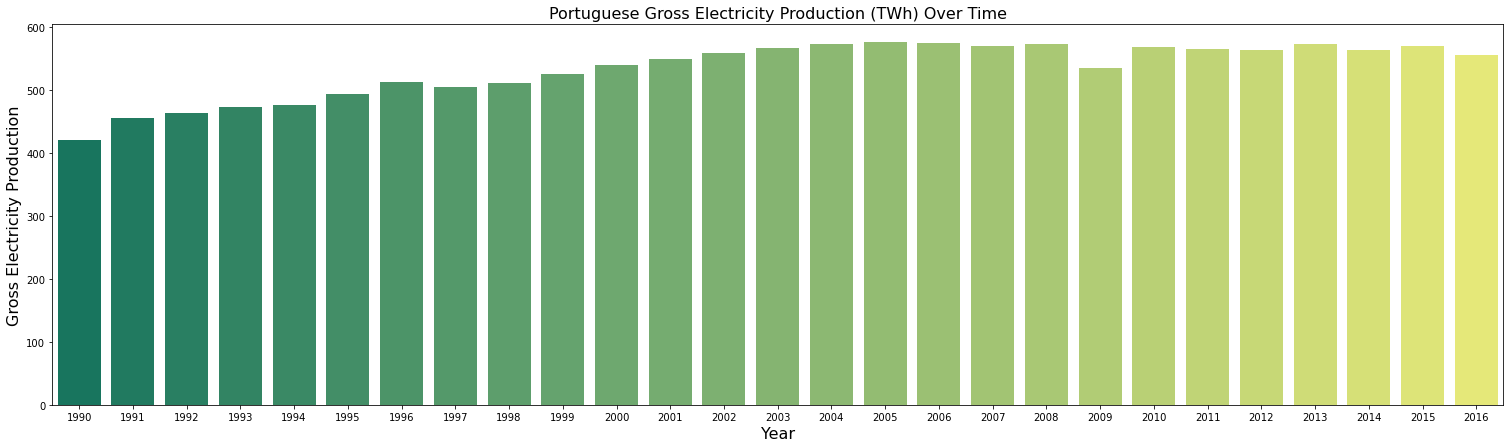

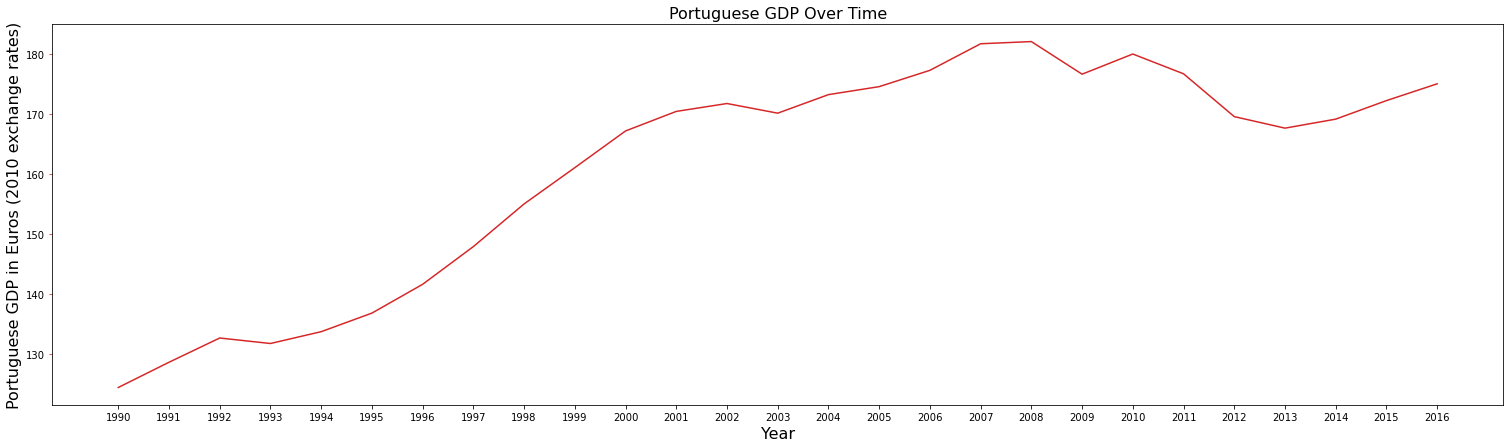

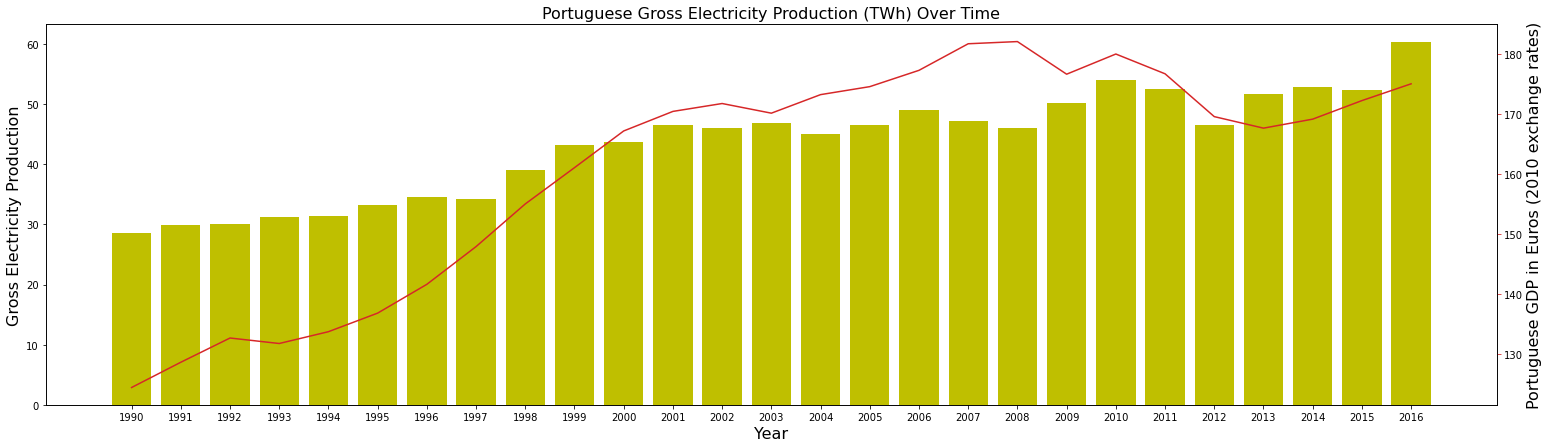

In [92]:
#only need to do this once, get the years into a list
years = list(dfPortugueseElectricityProduction.columns.values)
#get Portuguese gross production data into a list
dfPortugueseElectricityProduction_transposed = dfPortugueseElectricityProduction.transpose()
grosselectricityproductionportugal = dfPortugueseElectricityProduction_transposed['Gross Electricity Generation, by Fuel - TWh'].tolist()

#Create individual charts
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('Portuguese Gross Electricity Production (TWh) Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Gross Electricity Production', fontsize=16)

ax1 = sns.barplot(x=years, y=grosselectricityproductionfrench, data=dfFrenchElectricityProduction_transposed, palette='summer')
ax1.tick_params(axis='y')

#get Portuguese GDP data into a list
dfPortugueseGDP_transposed = dfPortugueseGDP.transpose()
GDPPortugal = dfPortugueseGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].tolist()

fig, ax2 = plt.subplots(figsize=(26,7))
color = 'tab:red'
#line plot creation
ax2.set_title('Portuguese GDP Over Time', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Portuguese GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPFrance, data=dfFrenchGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set(xticks=years)
#show plot
plt.show()

#Create combo charts
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('Portuguese Gross Electricity Production (TWh) Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Gross Electricity Production', fontsize=16)

ax1.bar(years, grosselectricityproductionportugal, color = 'y')
ax1.set(xticks=years)

#get Portuguese GDP data into a list
dfPortugueseGDP_transposed = dfPortugueseGDP.transpose()
GDPPortugal = dfPortugueseGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].tolist()

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Portuguese GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPPortugal, data=dfPortugueseGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

From graphing GDP over time compared to Gross Electricity Production over time for each of these three countries, we can see that there isn't necessarily a whole lot of correlation between the two. For France and Germany, Gross Electricity Production over time hardly moves, yet GDP continues to climb from 1990 to 2016. Portugal sees growth on both counts over time, but that does not necessarily indicate correlation. 

With Gross Electricity Production and GDP (adjusted for inflation since 2010) now graphed, it would be interesting to create nine combo charts specifically for nuclear energy, renewables, and gas compared to GDP over time (three each). 

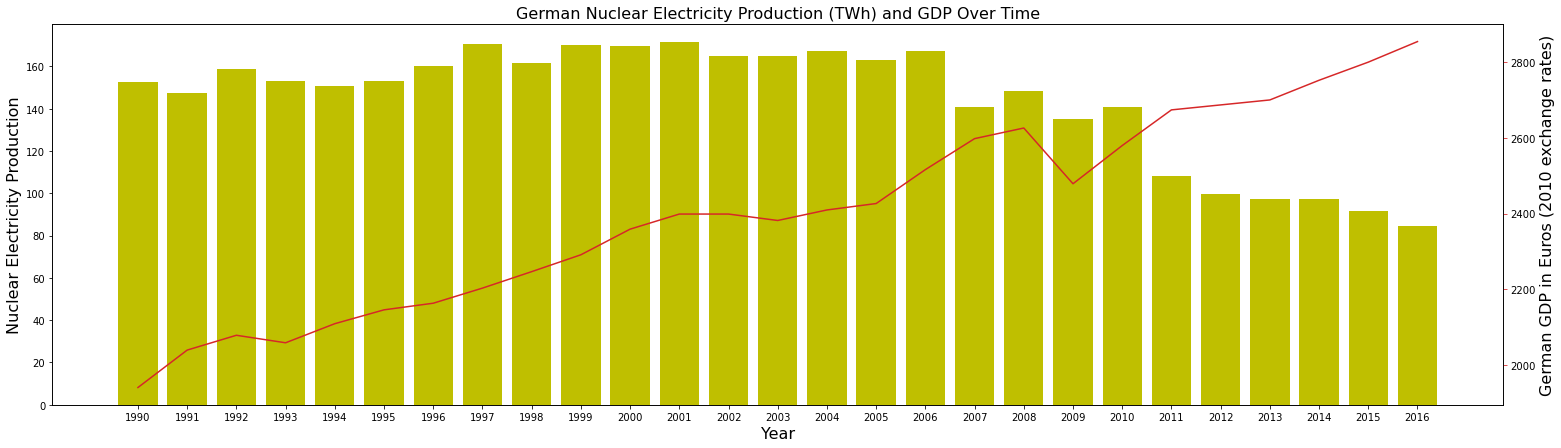

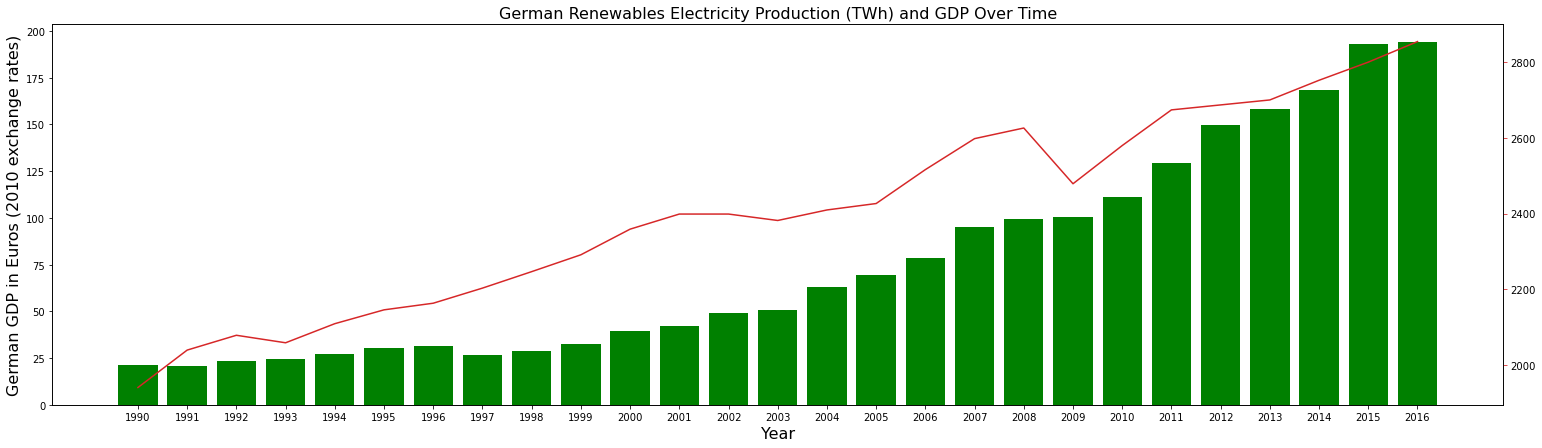

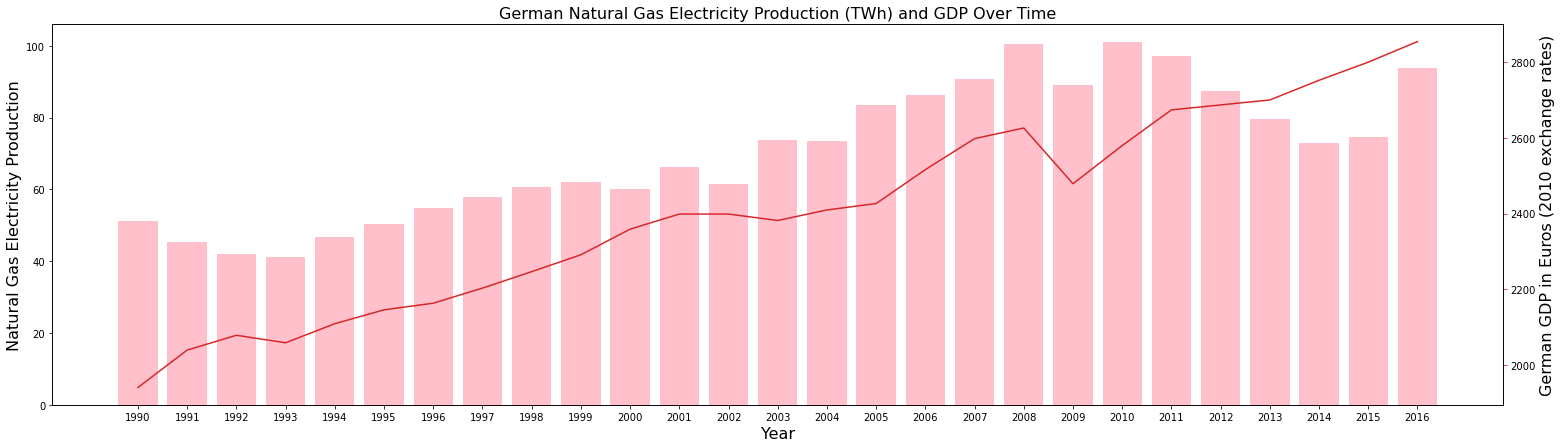

In [83]:
#get German nuclear production data into a list
dfGermanElectricityProduction_transposed = dfGermanElectricityProduction.transpose()
NuclearElectricityGermany = dfGermanElectricityProduction_transposed['Nuclear'].tolist()

#get German renewables production data into a list
dfGermanElectricityProduction_transposed = dfGermanElectricityProduction.transpose()
RenewablesElectricityGermany = dfGermanElectricityProduction_transposed['Renewables'].tolist()

#get German gas production data into a list
dfGermanElectricityProduction_transposed = dfGermanElectricityProduction.transpose()
GasElectricityGermany = dfGermanElectricityProduction_transposed['Gases'].tolist()

#Create combo charts (nuclear)
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('German Nuclear Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Nuclear Electricity Production', fontsize=16)

ax1.bar(years, NuclearElectricityGermany, color = 'y')
ax1.set(xticks=years)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('German GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPGermany, data=dfGermanGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


#Create combo charts (renewables)
fig, ax3 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax3.set_title('German Renewables Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('Renewables Electricity Production', fontsize=16)

ax3.bar(years, RenewablesElectricityGermany, color = 'g')
ax3.set(xticks=years)

#specify we want to share the same x-axis
ax4 = ax3.twinx()
color = 'tab:red'
#line plot creation
ax3.set_ylabel('German GDP in Euros (2010 exchange rates)', fontsize=16)
ax3 = sns.lineplot(x=years, y=GDPGermany, data=dfGermanGDP_transposed, sort=False, color=color)
ax3.tick_params(axis='y', color=color)
#show plot
plt.show()

#Create combo charts (renewables)
fig, ax5 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax5.set_title('German Natural Gas Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax5.set_xlabel('Year', fontsize=16)
ax5.set_ylabel('Natural Gas Electricity Production', fontsize=16)

ax5.bar(years, GasElectricityGermany, color = 'pink')
ax5.set(xticks=years)

#specify we want to share the same x-axis
ax6 = ax5.twinx()
color = 'tab:red'
#line plot creation
ax6.set_ylabel('German GDP in Euros (2010 exchange rates)', fontsize=16)
ax6 = sns.lineplot(x=years, y=GDPGermany, data=dfGermanGDP_transposed, sort=False, color=color)
ax6.tick_params(axis='y', color=color)
#show plot
plt.show()

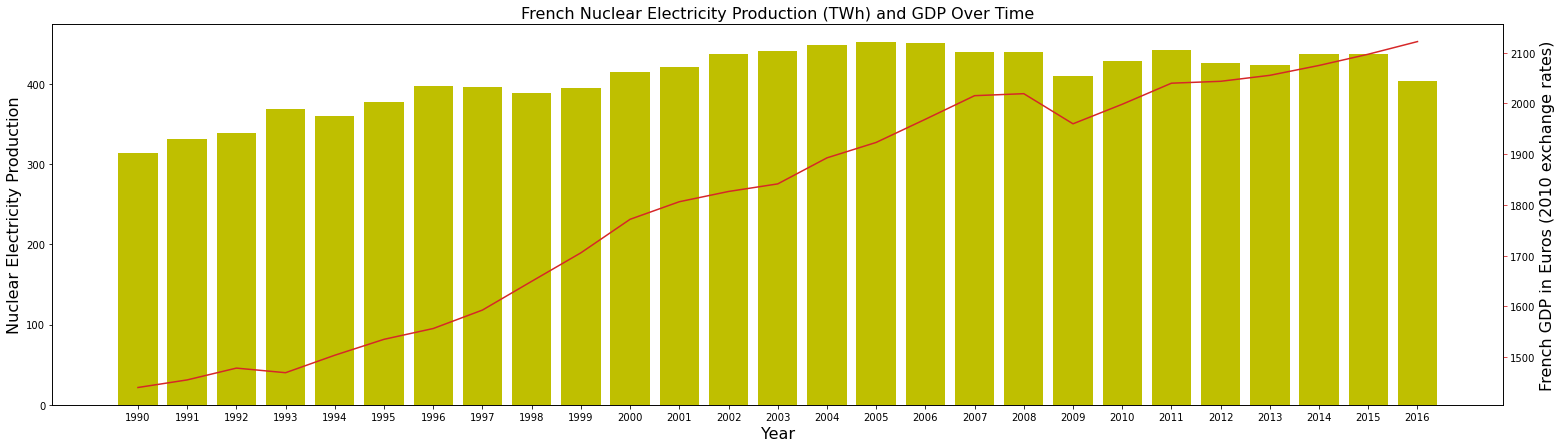

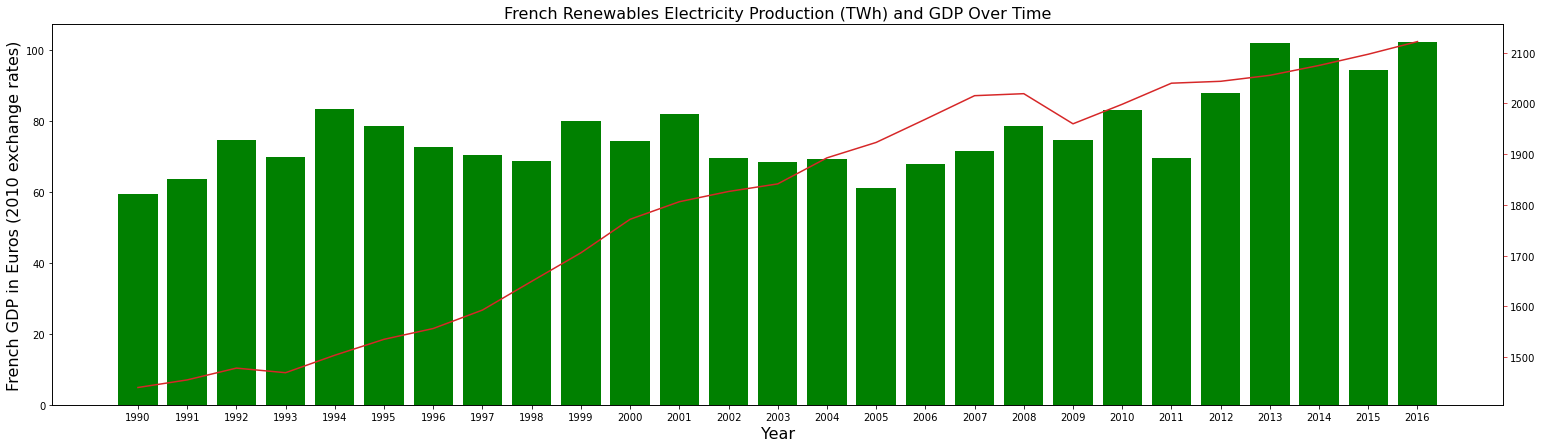

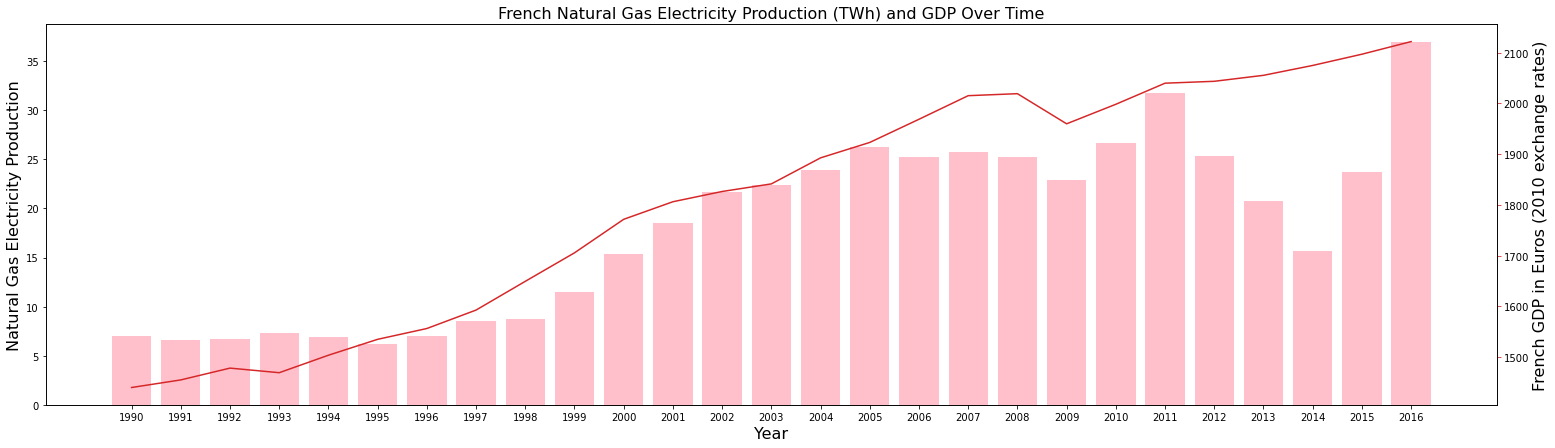

In [96]:
#get French nuclear production data into a list
dfFrenchElectricityProduction_transposed = dfFrenchElectricityProduction.transpose()
NuclearElectricityFrance = dfFrenchElectricityProduction_transposed['Nuclear'].tolist()

#get French renewables production data into a list
dfFrenchElectricityProduction_transposed = dfFrenchElectricityProduction.transpose()
RenewablesElectricityFrance = dfFrenchElectricityProduction_transposed['Renewables'].tolist()

#get French gas production data into a list
dfFrenchElectricityProduction_transposed = dfFrenchElectricityProduction.transpose()
GasElectricityFrance = dfFrenchElectricityProduction_transposed['Gases'].tolist()

#Create combo charts (nuclear)
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('French Nuclear Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Nuclear Electricity Production', fontsize=16)

ax1.bar(years, NuclearElectricityFrance, color = 'y')
ax1.set(xticks=years)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('French GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPFrance, data=dfFrenchGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


#Create combo charts (renewables)
fig, ax3 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax3.set_title('French Renewables Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('Renewables Electricity Production', fontsize=16)

ax3.bar(years, RenewablesElectricityFrance, color = 'g')
ax3.set(xticks=years)

#specify we want to share the same x-axis
ax4 = ax3.twinx()
color = 'tab:red'
#line plot creation
ax3.set_ylabel('French GDP in Euros (2010 exchange rates)', fontsize=16)
ax3 = sns.lineplot(x=years, y=GDPFrance, data=dfFrenchGDP_transposed, sort=False, color=color)
ax3.tick_params(axis='y', color=color)
#show plot
plt.show()

#Create combo charts (renewables)
fig, ax5 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax5.set_title('French Natural Gas Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax5.set_xlabel('Year', fontsize=16)
ax5.set_ylabel('Natural Gas Electricity Production', fontsize=16)

ax5.bar(years, GasElectricityFrance, color = 'pink')
ax5.set(xticks=years)

#specify we want to share the same x-axis
ax6 = ax5.twinx()
color = 'tab:red'
#line plot creation
ax6.set_ylabel('French GDP in Euros (2010 exchange rates)', fontsize=16)
ax6 = sns.lineplot(x=years, y=GDPFrance, data=dfFrenchGDP_transposed, sort=False, color=color)
ax6.tick_params(axis='y', color=color)
#show plot
plt.show()

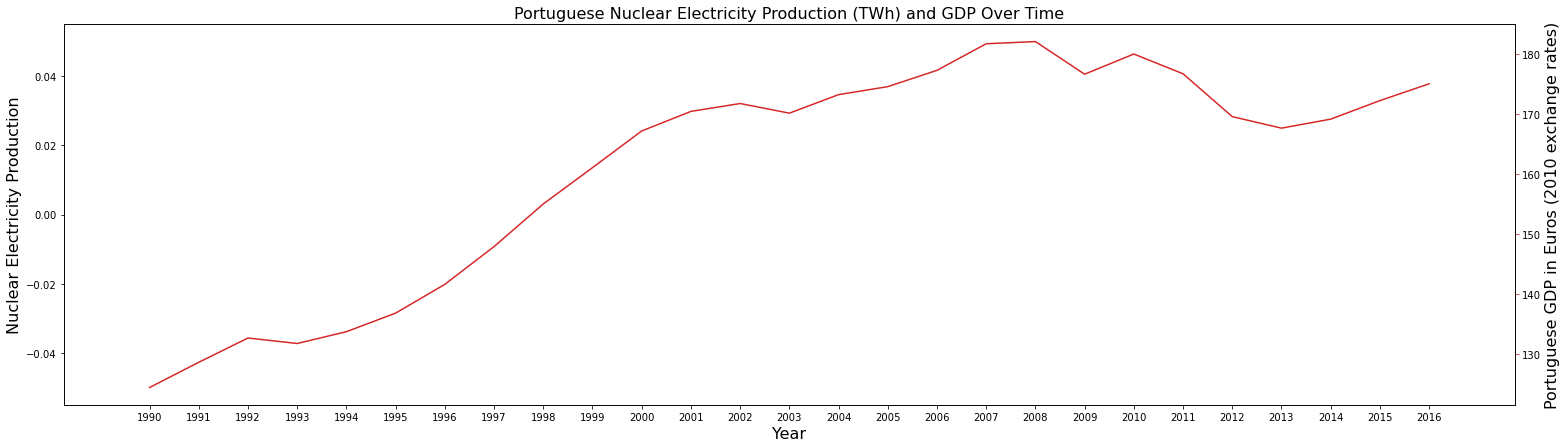

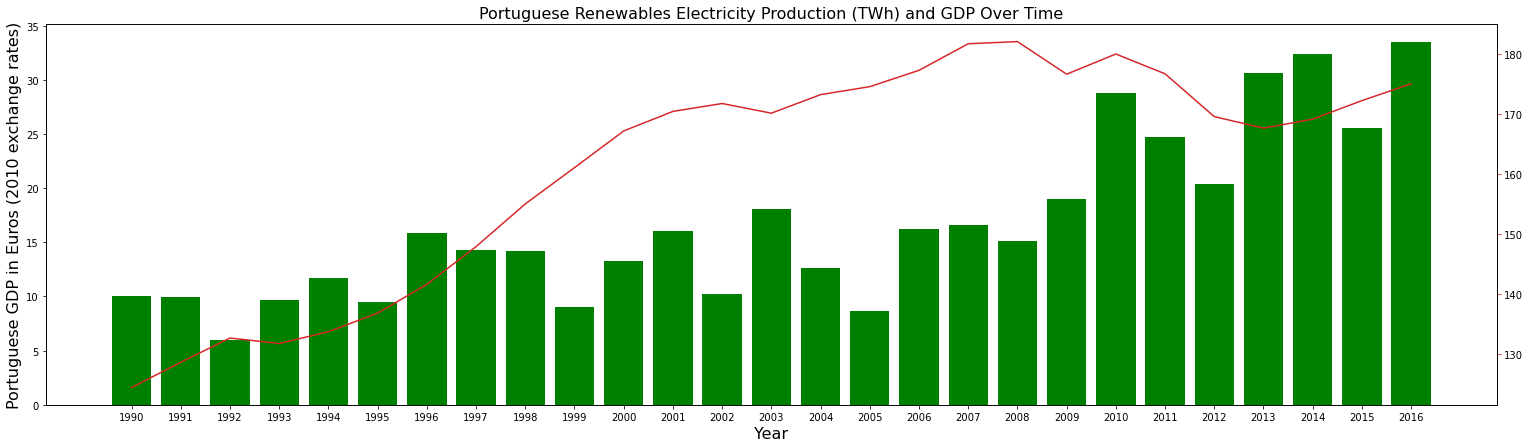

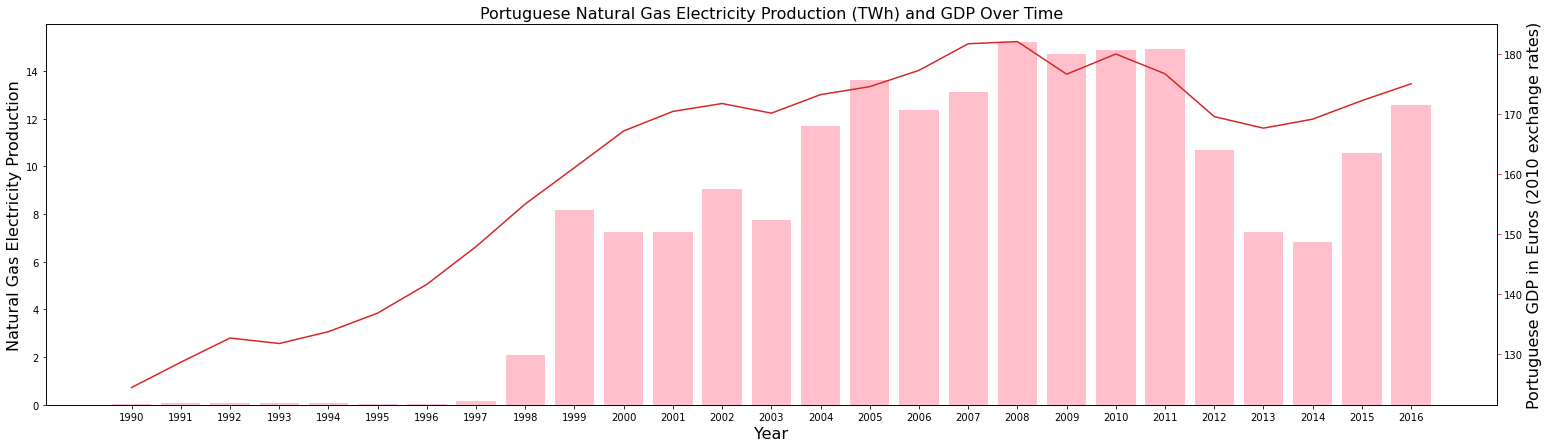

In [89]:
#get Portuguese nuclear production data into a list
dfPortugueseElectricityProduction_transposed = dfPortugueseElectricityProduction.transpose()
NuclearElectricityPortugal = dfPortugueseElectricityProduction_transposed['Nuclear'].tolist()

#get Portuguese renewables production data into a list
dfPortugueseElectricityProduction_transposed = dfPortugueseElectricityProduction.transpose()
RenewablesElectricityPortugal = dfPortugueseElectricityProduction_transposed['Renewables'].tolist()

#get Portuguese gas production data into a list
dfPortugueseElectricityProduction_transposed = dfPortugueseElectricityProduction.transpose()
GasElectricityPortugal = dfPortugueseElectricityProduction_transposed['Gases'].tolist()

#Create combo charts (nuclear)
fig, ax1 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('Portuguese Nuclear Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Nuclear Electricity Production', fontsize=16)

ax1.bar(years, NuclearElectricityPortugal, color = 'y')
ax1.set(xticks=years)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Portuguese GDP in Euros (2010 exchange rates)', fontsize=16)
ax2 = sns.lineplot(x=years, y=GDPPortugal, data=dfPortugueseGDP_transposed, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


#Create combo charts (renewables)
fig, ax3 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax3.set_title('Portuguese Renewables Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('Renewables Electricity Production', fontsize=16)

ax3.bar(years, RenewablesElectricityPortugal, color = 'g')
ax3.set(xticks=years)

#specify we want to share the same x-axis
ax4 = ax3.twinx()
color = 'tab:red'
#line plot creation
ax3.set_ylabel('Portuguese GDP in Euros (2010 exchange rates)', fontsize=16)
ax3 = sns.lineplot(x=years, y=GDPPortugal, data=dfPortugueseGDP_transposed, sort=False, color=color)
ax3.tick_params(axis='y', color=color)
#show plot
plt.show()

#Create combo charts (renewables)
fig, ax5 = plt.subplots(figsize=(26,7))
color = 'tab:green'
#bar plot creation
ax5.set_title('Portuguese Natural Gas Electricity Production (TWh) and GDP Over Time', fontsize=16)
ax5.set_xlabel('Year', fontsize=16)
ax5.set_ylabel('Natural Gas Electricity Production', fontsize=16)

ax5.bar(years, GasElectricityPortugal, color = 'pink')
ax5.set(xticks=years)

#specify we want to share the same x-axis
ax6 = ax5.twinx()
color = 'tab:red'
#line plot creation
ax6.set_ylabel('Portuguese GDP in Euros (2010 exchange rates)', fontsize=16)
ax6 = sns.lineplot(x=years, y=GDPPortugal, data=dfPortugueseGDP_transposed, sort=False, color=color)
ax6.tick_params(axis='y', color=color)
#show plot
plt.show()

Interesting results. Of course, Portugal produces no nuclear energy, so it's graph for that is blank, but otherwise, we can compare all three countries and make observations pertaining to any apparent commonalities or differences. 

For Germany, nuclear energy seems independent of GDP, remaining relatively static until beginning a marked decline in 2006, while GDP continued a relative rise. Renewables increased over time with GDP, seeing a slowing in growth when GDP dipped during the Great Recession, so that's interesting. More interesting is that Natural Gas production appears at first to correlate rather well with the ups and downs of GDP over time, at least until the 2010s, when the two begin to diverge. Perhaps this has some relation to a shift towards imports of Natural Gas from other countries such as the Russian Federation. 

For France, nuclear energy grew with GDP until around 2005; from there, GDP continued to climb overall while nuclear remained largely static, even seeing some decline. Unlike Germany, renewables do not see much of a trend matching GDP over time. Natural Gas, however, does show a similar trend to Germany's relation of natural gas electricity production and GDP, except France also sees a large spike back up in natural gas electricity production in 2016. 

For Portugal, little is to be said on nuclear energy, as they continue to produce zero electricity from nuclear power plants. Renewables have seen an increase relative to the 1990s, but that increase was marked with a significant amount of fluctuation, and GDP appears to move largely independently. Interestingly enough, Natural Gas electricity production also seems to correlate somewhat with Portuguese GDP over time, and in the 2010s, more strongly than France or Germany, it seems. 

On to the pie/donut charts for these countries to break down electricity production by type for years of interest. Specifically, because of the observations regarding Natural Gas, it would be interesting to compare 2011 and 2016 energy production distributions for these three countries to see if the divergence of GDP and Natural Gas trends for France and Germany may have some relation to other changes in the energy sectors of the respective states.

In [175]:
DEProd2011 = dfGermanElectricityProduction[2011].tolist()
#remove Gross production, and overall Renewables, we don't want that on the chart
DEProd2011.pop(5)
DEProd2011.pop(0)
#repeat for other years
DEProd2016 = dfGermanElectricityProduction[2016].tolist()
DEProd2016.pop(5)
DEProd2016.pop(0)
FRProd2011 = dfFrenchElectricityProduction[2011].tolist()
FRProd2011.pop(5)
FRProd2011.pop(0)
FRProd2016 = dfFrenchElectricityProduction[2016].tolist()
FRProd2016.pop(5)
FRProd2016.pop(0)
PTProd2011 = dfPortugueseElectricityProduction[2011].tolist()
PTProd2011.pop(5)
PTProd2011.pop(0)
PTProd2016 = dfPortugueseElectricityProduction[2016].tolist()
PTProd2016.pop(5)
PTProd2016.pop(0)

########
labels = ['Solid Fuels','Petroleum','Gas','Nuclear',"Hydro","Pumped Hydro","Wind","Biomass","Solar","Geothermal","Tidal","Wastes","Other"]
colors=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "brown", "grey", "brown", "black", "white"]

from plotly.subplots import make_subplots
#Germany
fig = make_subplots(
    rows=1, cols=2, subplot_titles = ('2011','2016'),
    specs=[
        [{"type": "domain"}, {"type": "domain"}],
    ]
)
fig.add_trace(go.Pie(labels=labels, values=DEProd2011, textfont_size=9, scalegroup='one', legendgroup = 'group1',
                        name="2011", hole=0.3), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=DEProd2016, textfont_size=9, scalegroup='one', legendgroup = 'group1',
                     name="2016", hole=0.3), 1, 2)

fig.update_layout(title_text='German Electricity Generation Sources: 2011 vs 2016')
fig.show()

#France
fig.add_trace(go.Pie(labels=labels, values=FRProd2011, textfont_size=9, legendgroup = 'group1',
                     name="2011", hole=0.3), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=FRProd2016, textfont_size=9, legendgroup = 'group1',
                     name="2016", hole=0.3), 1, 2)

fig.update_layout(title_text='French Electricity Generation Sources: 2011 vs 2016')
fig.show()

#Portugal 

fig.add_trace(go.Pie(labels=labels, values=PTProd2011, textfont_size=9, legendgroup = 'group1',
                     name="2011", hole=0.3), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=PTProd2016, textfont_size=9, legendgroup = 'group1',
                     name="2016", hole=0.3), 1, 2)
fig.update_layout(title_text='Portuguese Electricity Generation Sources: 2011 vs 2016')
fig.show()

From these donut charts, we can compare the general electricity production landscapes of each of the three countries between 2011 and 2016. 

We can see for Germany that nearly every type of renewable energy increased its share of electricity production while solid fuels, natural gas, and nuclear all declined in terms of percent share; however, hovering over the charts and looking at the numbers tells us that some of these changes weren't quite so drastic, even though there were real absolute declines. Particularly for natural gas, there was an evident percent decline. 

For France, natural gas actually increased alongside renewables, with nuclear energy production taking the biggest hit.

With regards to Portugal, gas did see a decline, and interestingly enough, solid fuels saw an increase alongside renewables. 

3. A third visualization that might be appropriate for this data set could be a tree map for the electricity production distribution, but perhaps for the 2011 vs 2016 comparison specifically, something like a stacked horizontal bar graph would have been much more useful and effective in conveying the differences in production between the two years. 

In [189]:
#Portugal Correlation factors
Portugal_NuclearGDP_Correlation = dfPortugueseGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfPortugueseElectricityProduction_transposed['Nuclear'].astype('float64'))
Portugal_RenewablesGDP_Correlation = dfPortugueseGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfPortugueseElectricityProduction_transposed['Renewables'].astype('float64'))
Portugal_GasGDP_Correlation = dfPortugueseGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfPortugueseElectricityProduction_transposed['Gases'].astype('float64'))
#Portugal Correlation factors
France_NuclearGDP_Correlation = dfFrenchGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfFrenchElectricityProduction_transposed['Nuclear'].astype('float64'))
France_RenewablesGDP_Correlation = dfFrenchGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfFrenchElectricityProduction_transposed['Renewables'].astype('float64'))
France_GasGDP_Correlation = dfFrenchGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfFrenchElectricityProduction_transposed['Gases'].astype('float64'))
#Portugal Correlation factors
German_NuclearGDP_Correlation = dfGermanGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfGermanElectricityProduction_transposed['Nuclear'].astype('float64'))
German_RenewablesGDP_Correlation = dfGermanGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfGermanElectricityProduction_transposed['Renewables'].astype('float64'))
German_GasGDP_Correlation = dfGermanGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').corr(dfGermanElectricityProduction_transposed['Gases'].astype('float64'))
#get correlation values between GDP and different energy sources. These will be graphed. 

In [195]:
#turn those correlation values into lists to be turned into a new dataframe with Pandas.
dfCorrelationTable = pd.DataFrame({"Germany":[German_NuclearGDP_Correlation, German_RenewablesGDP_Correlation, German_GasGDP_Correlation], 
                                  "France":[France_NuclearGDP_Correlation, France_RenewablesGDP_Correlation, France_GasGDP_Correlation], 
                                  "Portugal":[Portugal_NuclearGDP_Correlation, Portugal_RenewablesGDP_Correlation, Portugal_GasGDP_Correlation]})
dfCorrelationTable.index = ['Correlation of GDP and Nuclear Energy Production', 'Correlation of GDP and Renewables Energy Production', 'Correlation of GDP and Natural Gas Energy Production']
dfCorrelationTable = dfCorrelationTable.fillna(0)

dfCorrelationTable.head(3)

,Germany,France,Portugal
Correlation of GDP and Nuclear Energy Production,-0.706767,0.837219,0.000000
Correlation of GDP and Renewables Energy Production,0.929395,0.520251,0.537466
Correlation of GDP and Natural Gas Energy Production,0.846749,0.906628,0.933592


We have a table of the Correlation coefficients for the different energy types for each of these countries, respectively, and their GDP, adjust for inflation. We can also produce heatmaps of these correlations. 

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   GDP2010 [Mrd EUR at 2010 exchange rates]  27 non-null     float64
 1   Nuclear                                   27 non-null     float64
 2   Renewables                                27 non-null     float64
 3   Gases                                     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


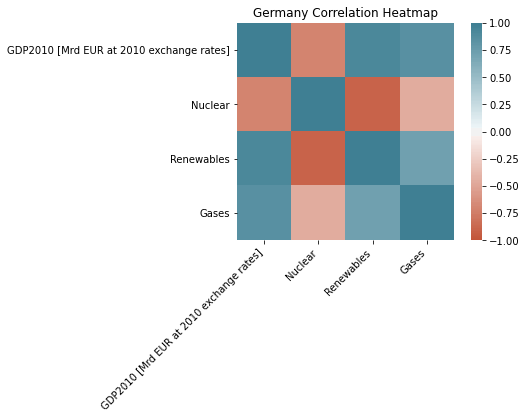

In [277]:
#heatmap for Germany
dfDECorr = pd.DataFrame()
dfDECorr['GDP2010 [Mrd EUR at 2010 exchange rates]'] = dfGermanGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').copy()
dfDECorr['Nuclear'] = dfGermanElectricityProduction_transposed['Nuclear'].astype('float64').copy()
dfDECorr['Renewables'] = dfGermanElectricityProduction_transposed['Renewables'].astype('float64').copy()
dfDECorr['Gases'] = dfGermanElectricityProduction_transposed['Gases'].astype('float64').copy()
dfDECorr.info()

dfDECorr.corr()
DECorr = dfDECorr.corr()
ax = sns.heatmap(
    DECorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_title("Germany Correlation Heatmap")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   GDP2010 [Mrd EUR at 2010 exchange rates]  27 non-null     float64
 1   Nuclear                                   27 non-null     float64
 2   Renewables                                27 non-null     float64
 3   Gases                                     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


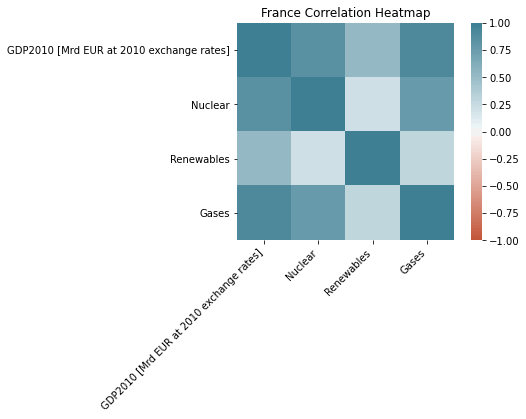

In [278]:
#heatmap for France
dfFRCorr = pd.DataFrame()
dfFRCorr['GDP2010 [Mrd EUR at 2010 exchange rates]'] = dfFrenchGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').copy()
dfFRCorr['Nuclear'] = dfFrenchElectricityProduction_transposed['Nuclear'].astype('float64').copy()
dfFRCorr['Renewables'] = dfFrenchElectricityProduction_transposed['Renewables'].astype('float64').copy()
dfFRCorr['Gases'] = dfFrenchElectricityProduction_transposed['Gases'].astype('float64').copy()
dfFRCorr.info()

dfFRCorr.corr()
FRCorr = dfFRCorr.corr()
ax1 = sns.heatmap(
    FRCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax1.set_title("France Correlation Heatmap")
ax1.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   GDP2010 [Mrd EUR at 2010 exchange rates]  27 non-null     float64
 1   Nuclear                                   27 non-null     float64
 2   Renewables                                27 non-null     float64
 3   Gases                                     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


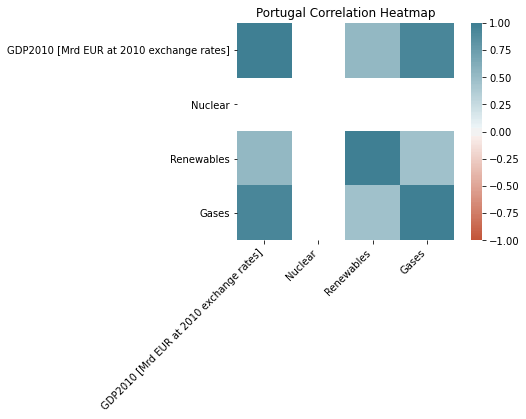

In [281]:
#heatmap for Portugal
dfPTCorr = pd.DataFrame()
dfPTCorr['GDP2010 [Mrd EUR at 2010 exchange rates]'] = dfPortugueseGDP_transposed['GDP2010 [Mrd EUR at 2010 exchange rates]'].astype('float64').copy()
dfPTCorr['Nuclear'] = dfPortugueseElectricityProduction_transposed['Nuclear'].astype('float64').copy()
dfPTCorr['Renewables'] = dfPortugueseElectricityProduction_transposed['Renewables'].astype('float64').copy()
dfPTCorr['Gases'] = dfPortugueseElectricityProduction_transposed['Gases'].astype('float64').copy()
dfPTCorr.info()

dfPTCorr.corr()
PTCorr = dfPTCorr.corr()
ax2 = sns.heatmap(
    PTCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax2.set_title("Portugal Correlation Heatmap")
ax2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [282]:
dfCorrelationTable.head(3)
#as a reminder

,Germany,France,Portugal
Correlation of GDP and Nuclear Energy Production,-0.706767,0.837219,0.000000
Correlation of GDP and Renewables Energy Production,0.929395,0.520251,0.537466
Correlation of GDP and Natural Gas Energy Production,0.846749,0.906628,0.933592


Conclusions:

While the correlation between Renewables production and GDP is strong for Germany, it is not very strong for either France or Portugal. 

Germany actually has negative correlation between Nuclear Energy and GDP, and Portugal produces no Nuclear Energy. Neither of these would serve as good indicators for GDP. 

Between all three countries, the correlation coefficient that is most similar and strongest among them is the correlation coefficient of Natural Gas Energy Production and GDP.


Correlation does not mean causation
Changes in GDP over time for each of these countries were not necessarily caused by changes in their energy production focuses, nor were sector changes in energy production changes necessarily caused by changes in GDP. 

Why this is interesting
However, seeing such close correlation with between Natural Gas Electricity Production and GDP is interesting, and changes in one over time can be monitored in the future as a potentially useful way to get an indication of what changes may occur to the other. 

Important to Consider
The fact that natural gas and GDP showed such a close relationship is interesting, as mentioned before. That being said, it is important to consider in ruminations on that interesting relationship the developments in natural gas technology and the role it plays in European geopolitics. However, that pontificating is beyond the scope of this visualization and analysis. 

